<a href="https://colab.research.google.com/github/yacinebouaouni/Image-Captioning/blob/master/CocoDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Using COCO Dataset:

In [0]:
import sys
import os
sys.path.append('./data')

In [18]:
!pip install pycocotools
!wget -P ./data/ http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -n ./data/annotations_trainval2014.zip -d ./data

--2020-05-22 04:52:58--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.179.91
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.179.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘./data/annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  98.4MB/s    in 2.5s    

2020-05-22 04:53:01 (98.4 MB/s) - ‘./data/annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  ./data/annotations_trainval2014.zip
  inflating: ./data/annotations/instances_train2014.json  
  inflating: ./data/annotations/instances_val2014.json  
  inflating: ./data/annotations/person_keypoints_train2014.json  
  inflating: ./data/annotations/person_keypoints_val2014.json  
  inflating: ./data/annotations/captions_train2014.json  
  inflating: ./data/annotations/captions_val2014.json  


In [19]:
from pycocotools.coco import COCO
dataDir='./data/annotations'
dataType='val2014'
instances_annFile = os.path.join(dataDir, 'instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

loading annotations into memory...
Done (t=5.95s)
creating index...
index created!
loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


In [0]:
ids=list(coco.anns.keys())

In [0]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

id=np.random.choice(ids) #Pick a random sample of data

ann=coco.anns[id] #Get the  annotations like box,segmentation,id of image
image_id=coco.anns[id]['image_id'] #Get the id of the image we want to load
image=coco.loadImgs(ids=image_id)[0] #Load the content of the image :url,date,name,licence....

image_url=image['coco_url'] #Get the url from image data to load the image


In [29]:
ann

{'area': 319.8065499999997,
 'bbox': [322.07, 247.51, 13.86, 43.23],
 'category_id': 1,
 'id': 2012324,
 'image_id': 97988,
 'iscrowd': 0,
 'segmentation': [[324.81,
   283.08,
   326.08,
   278.33,
   325.72,
   276.33,
   324.26,
   273.23,
   322.44,
   269.58,
   322.07,
   263.02,
   322.98,
   257.91,
   326.45,
   255.17,
   327.73,
   252.62,
   328.27,
   247.7,
   333.38,
   247.51,
   335.02,
   248.79,
   335.75,
   252.8,
   335.93,
   256.09,
   335.02,
   258.82,
   334.47,
   261.74,
   333.74,
   267.58,
   329.55,
   269.95,
   328.27,
   273.05,
   329.18,
   276.15,
   331.37,
   281.8,
   331.01,
   282.89],
  [324.26,
   287.82,
   329.0,
   290.74,
   335.2,
   289.28,
   334.47,
   286.72,
   324.26,
   286.72]]}

In [30]:
image

{'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000097988.jpg',
 'date_captured': '2013-11-16 21:25:34',
 'file_name': 'COCO_val2014_000000097988.jpg',
 'flickr_url': 'http://farm4.staticflickr.com/3776/8915831253_be956c6851_z.jpg',
 'height': 612,
 'id': 97988,
 'license': 2,
 'width': 612}

In [32]:
image_url

'http://images.cocodataset.org/val2014/COCO_val2014_000000097988.jpg'

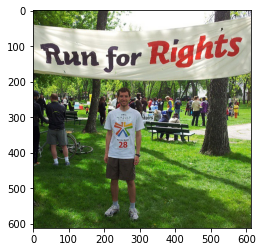

In [34]:
I=io.imread(image_url)
plt.imshow(I)

In [35]:
# load and display captions
annIds = coco_caps.getAnnIds(imgIds=image['id']) #Get the id of the caption
anns = coco_caps.loadAnns(annIds) #Load the caption
coco_caps.showAnns(anns) #Show

Man standing under banner that reads "Run for Rights"
A man standing underneath a marathon sign in the grass
A guy smiling while standing under a run for rights banner.
A man in racing gear and number under a banner.
A runner poses beneath a "Run for Rights" sign in a green city park. 
